In [133]:
# load plotting library and src files
using PyPlot
include("./src/calcpml_2d.jl");
include("./src/yeeder.jl");
include("./src/fdfd.jl");
include("./src/calc_gradient.jl");

In [156]:
L = 1;
dl = 0.01;
beta = 1;
lam = 2*L*beta;
spc = L*0.25;
src = L*0.5;
pml = 40*dl;
Pol = "Hz";
BC = [-2,-2];
NPML = [0 0 40 40];
RES = [dl/2 dl/2];

X = lam;
Y = 2*(L+spc+src+src+pml);

Nx = Int(X/dl);
Ny = Int(Y/dl);

Ne = 30;
eps_range = linspace(1,sqrt(8),Ne);
de = 0.001;

AVM_s = zeros(Ne,1);
D_s = zeros(Ne,1);
G_list = zeros(Ne,1);
phi_list = zeros(Ne,1);

b_init = zeros(Complex64,Nx,Ny);
b_init[:,Int(Ny/2-spc/dl-L/dl-src/dl)] = 1;
b_init[:,Int(Ny/2+spc/dl+L/dl+src/dl)] = -1;

MUR2 = ones(Complex64,Nx*2,Ny*2);
ER2 = ones(Complex64,Nx*2,Ny*2);

Ex0 = zeros(Complex64,Nx,Ny);

In [157]:
for i in (1:Ne)
    println(i/Ne*100.0);
    eps = eps_range[i];
    
    #original calculation    
    ER2[Int(Nx-L/dl):Int(Nx+L/dl),Int(Ny-2*spc/dl-2*L/dl):Int(Ny-2*spc/dl)] = eps;
    ER2[Int(Nx-L/dl):Int(Nx+L/dl),Int(Ny+2*spc/dl):Int(Ny+2*spc/dl+2*L/dl)] = eps;
    
    (Ex0,Ey0,Ez0,Hx0,Hy0,Hz0) = fdfd(ER2,MUR2,RES,NPML,BC,lam,Pol,b_init);
    (G,phi) = calc_gradient(Ex0,lam,dl,beta);
    G_list[i] = G;
    phi_list[i] = phi;    
end

3.3333333333333335
1.1709383462843448e-17
6.666666666666667
0.0010030623458434542
10.0
0.018663195381057703
13.333333333333334
0.006899257450426533
16.666666666666664
0.00661765710412569
20.0
0.0069620574776983
23.333333333333332
0.007324629352731513
26.666666666666668
0.007495860399595219
30.0
0.007344636094993005
33.33333333333333
0.006781790037278567
36.666666666666664
0.005766140231836938
40.0
0.004314805101491878
43.333333333333336
0.0025026596150348923
46.666666666666664
0.00044526295361682844
50.0
0.0017296174219774308
53.333333333333336
0.003913045053164979
56.666666666666664
0.006041358149762918
60.0
0.008121833076747836
63.33333333333333
0.01027009131135501
66.66666666666666
0.012389166011882028
70.0
0.0017069552872552441
73.33333333333333
0.004931221265849605
76.66666666666667
0.008028614917191196
80.0
0.009471392721145342
83.33333333333334
0.01029974036066903
86.66666666666667
0.01081526380269086
90.0
0.01114051162598726
93.33333333333333
0.011340450291362516
96.66666666666

In [2]:
plot(eps_range,G_list);

LoadError: LoadError: UndefVarError: plot not defined
while loading In[2], in expression starting on line 1

In [1]:
pcolormesh(real(Ex0[:,80:end-80]),cmap="RdBu")
colorbar()

LoadError: LoadError: UndefVarError: pcolormesh not defined
while loading In[1], in expression starting on line 1

0.45135944105648046

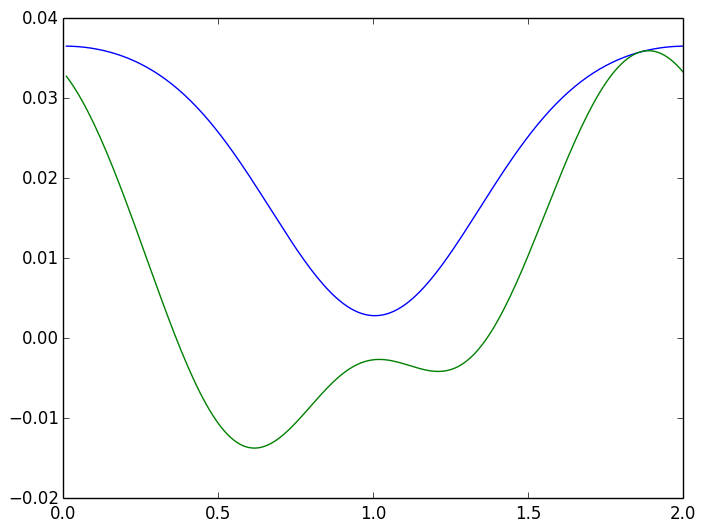

1.4985224295903057

In [160]:
#xs = dl*(1:Nx);
#(a,b) = size(Ex0);
#plot(xs,imag(Ex0[:,Int(b/2)]))
#phi = phi_list[1];
#println(phi)
#plot(xs,real(Ex0[:,int(b/2)]))
#plot(xs,real(Ex0[:,Int(b/2)].*exp(im*(2*pi/lam/beta*xs + phi*ones(Nx,1)))))
#sum(real(Ex0[:,Int(b/2)].*exp(im*(2*pi/lam/beta*xs + phi*ones(Nx,1)))))